# Lab4: Statistical Learning in Python

Outline:
1. Data Pre-procesing: pandas
2. statsmodels and sklearn

# Problem Statement

Estimate the **probability of Stephen Curry scoring a triple shot** in any given game as a function of other predictors such as period and position.


# 1. Loading data

In [1]:
import numpy as np

In [2]:
# import module
import helper_basketball as h
import imp
imp.reload(h);

In [3]:
params = {'PlayerID':'201939',
          'PlayerPosition':'',
          'Season':'2016-17',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

shotdata = h.get_nba_data('shotchartdetail', params)
shotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,2,...,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,Shot Chart Detail,0021600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,6,...,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,Shot Chart Detail,0021600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,23,...,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
3,Shot Chart Detail,0021600003,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,1,...,Right Side Center(RC),16-24 ft.,21,163,141,1,0,20161025,GSW,SAS
4,Shot Chart Detail,0021600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,47,...,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS


# 2. Data Pre-processing

Our task is first to obtain the total number of attempted and scored shots in any given game.

In [4]:
# See dtype of each column
shotdata.dtypes

GRID_TYPE              object
GAME_ID                object
GAME_EVENT_ID           int64
PLAYER_ID               int64
PLAYER_NAME            object
TEAM_ID                 int64
TEAM_NAME              object
PERIOD                  int64
MINUTES_REMAINING       int64
SECONDS_REMAINING       int64
EVENT_TYPE             object
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
SHOT_ATTEMPTED_FLAG     int64
SHOT_MADE_FLAG          int64
GAME_DATE              object
HTM                    object
VTM                    object
dtype: object

In [5]:
# Unique values of column of interest
shotdata["EVENT_TYPE"].unique()

array(['Missed Shot', 'Made Shot'], dtype=object)

In [6]:
shotdata["SHOT_ZONE_AREA"].unique()

array(['Right Side Center(RC)', 'Center(C)', 'Left Side Center(LC)',
       'Right Side(R)', 'Left Side(L)', 'Back Court(BC)'], dtype=object)

In [7]:
shotdata["SHOT_TYPE"].unique()

array(['3PT Field Goal', '2PT Field Goal'], dtype=object)

In [8]:
shotdata["SHOT_ZONE_RANGE"].unique()

array(['24+ ft.', '16-24 ft.', 'Less Than 8 ft.', '8-16 ft.',
       'Back Court Shot'], dtype=object)

In [9]:
shotdata["GAME_DATE"].unique()

array(['20161025', '20161028', '20161030', '20161101', '20161103',
       '20161104', '20161107', '20161109', '20161110', '20161113',
       '20161116', '20161118', '20161119', '20161121', '20161123',
       '20161125', '20161126', '20161128', '20161201', '20161203',
       '20161205', '20161207', '20161208', '20161210', '20161211',
       '20161213', '20161215', '20161217', '20161220', '20161222',
       '20161223', '20161225', '20161228', '20161230', '20170102',
       '20170104', '20170106', '20170108', '20170110', '20170112',
       '20170116', '20170118', '20170120', '20170122', '20170123',
       '20170125', '20170128', '20170201', '20170202', '20170204',
       '20170208', '20170210', '20170211', '20170213', '20170215',
       '20170223', '20170225', '20170227', '20170228', '20170302',
       '20170305', '20170306', '20170308', '20170310', '20170314',
       '20170316', '20170318', '20170320', '20170321', '20170324',
       '20170326', '20170328', '20170329', '20170331', '201704

In [10]:
shotdata["SHOT_ATTEMPTED_FLAG"].unique()

array([1])

In [11]:
shotdata["SHOT_MADE_FLAG"].unique()

array([0, 1])

In [12]:
train_data = shotdata.query('SHOT_TYPE=="3PT Field Goal"') # Only 3 pointers made
train_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,2,...,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,Shot Chart Detail,0021600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,6,...,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,Shot Chart Detail,0021600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,23,...,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
4,Shot Chart Detail,0021600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,47,...,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS
7,Shot Chart Detail,0021600003,223,201939,Stephen Curry,1610612744,Golden State Warriors,2,3,17,...,Right Side Center(RC),24+ ft.,27,114,247,1,1,20161025,GSW,SAS
8,Shot Chart Detail,0021600003,227,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,55,...,Right Side Center(RC),24+ ft.,28,130,252,1,0,20161025,GSW,SAS
9,Shot Chart Detail,0021600003,289,201939,Stephen Curry,1610612744,Golden State Warriors,3,8,36,...,Left Side Center(LC),24+ ft.,31,-169,262,1,0,20161025,GSW,SAS
10,Shot Chart Detail,0021600003,324,201939,Stephen Curry,1610612744,Golden State Warriors,3,5,8,...,Center(C),24+ ft.,29,-73,288,1,0,20161025,GSW,SAS
12,Shot Chart Detail,0021600003,343,201939,Stephen Curry,1610612744,Golden State Warriors,3,4,6,...,Right Side(R),24+ ft.,22,225,36,1,0,20161025,GSW,SAS
17,Shot Chart Detail,0021600003,474,201939,Stephen Curry,1610612744,Golden State Warriors,4,6,11,...,Left Side(L),24+ ft.,23,-232,26,1,0,20161025,GSW,SAS


# 3. Logistic regression

We assume that the total number of scored shots are the realized value of a Binomial experiment where:


- no. of trials: the total number of triple shots attempted.

- no. of successes: total number of triple shots scored.

- $p_{i}$ is the probability of scoring a triple in any given game (which is our parameter of interest).


## 3.1 `statsmodels` package

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
sm.GLM?

In [15]:
# Fitting models using R-style formulas:
# See: http://www.statsmodels.org/dev/example_formulas.html
fitted_model1 = smf.glm(formula = 'SHOT_MADE_FLAG ~ LOC_X + LOC_Y + C(PERIOD) + C(SHOT_ZONE_AREA)',
                        data=train_data, 
                        family=sm.families.Binomial()).fit()

In [16]:
# See results
print(fitted_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                  788
Model:                            GLM   Df Residuals:                      776
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -519.22
Date:                Fri, 27 Apr 2018   Deviance:                       1038.4
Time:                        19:19:24   Pearson chi2:                     787.
No. Iterations:                     6                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -2.0036      1.485   

In [17]:
#even though Shot_zone_area is object, not using C() function also works
fitted_model1 = smf.glm(formula = 'SHOT_MADE_FLAG ~ LOC_X + LOC_Y + C(PERIOD) + SHOT_ZONE_AREA',
                        data=train_data, 
                        family=sm.families.Binomial()).fit()
print(fitted_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                  788
Model:                            GLM   Df Residuals:                      776
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -519.22
Date:                Fri, 27 Apr 2018   Deviance:                       1038.4
Time:                        19:19:28   Pearson chi2:                     787.
No. Iterations:                     6                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -2.0036      1.485     -1.350 

## 3.2 `scilearn` package

In [18]:
from patsy import dmatrices # For constructing design matrices from R-types of formulae
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### 3.2.1 Prepare data for logistic regression

In [19]:
# create dataframes with an intercept column and dummy variables 
y, X = dmatrices('SHOT_MADE_FLAG ~ LOC_X + LOC_Y + C(PERIOD) + C(SHOT_ZONE_AREA)',
                  train_data, return_type="dataframe")

In [20]:
# flatten y into a 1-D array
y = np.ravel(y)

In [21]:
y

array([ 0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0

### 3.2.2 Train and test data 

In [22]:
from sklearn.model_selection import train_test_split 
train_test_split?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, # Predictors
                                                    y, # response
                                                    test_size=0.3, # % of test data 
                                                    random_state=123) # seed for random sampling

In [26]:
X_train.head()

,Intercept,C(PERIOD)[T.2],C(PERIOD)[T.3],C(PERIOD)[T.4],C(PERIOD)[T.5],C(SHOT_ZONE_AREA)[T.Center(C)],C(SHOT_ZONE_AREA)[T.Left Side Center(LC)],C(SHOT_ZONE_AREA)[T.Left Side(L)],C(SHOT_ZONE_AREA)[T.Right Side Center(RC)],C(SHOT_ZONE_AREA)[T.Right Side(R)],LOC_X,LOC_Y
1021,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.0,210.0
493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-232.0,-19.0
1316,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,197.0,165.0
285,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-165.0,267.0
698,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-19.0,301.0


### 3.3.3 Model fitting

In [24]:
LogisticRegression?

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

https://stackoverflow.com/questions/26319259/sci-kit-and-regression-summary

> There exists no `R` type regression summary report in sklearn. The main reason is that sklearn is used for predictive modelling / machine learning and the evaluation criteria are based on performance on previously unseen data (such as predictive r^2 for regression).
For a more classic statistical approach, take a look at statsmodels.

### 3.3.4 Predicting the test set results and calculating the accuracy

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


### 3.3.5 Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [28]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7) # 10 fold CV
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.568


### 3.3.6 Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[124  20]
 [ 78  15]]


### 3.3.7 Compute precision, recall, F-measure and support

To quote from Scikit Learn:

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

- The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

- The support is the number of occurrences of each class in y_test.


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.61      0.86      0.72       144
        1.0       0.43      0.16      0.23        93

avg / total       0.54      0.59      0.53       237



### 3.3.8 ROC curve

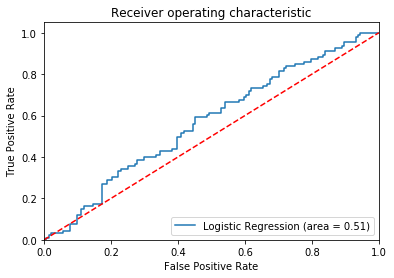

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Other ML methods

  - `KNeighborsClassifier`
  - `DecisionTreeClassifier(max_depth=5)`
  - `RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)`
  - `QuadraticDiscriminantAnalysis()`

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Example: Random Forest

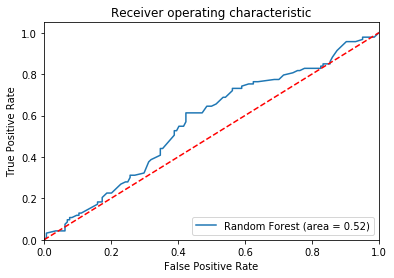

In [36]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
score = clf.score(X_test, y_test)
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 4. Conclusions

In [37]:
Pr_pred = clf.predict_proba(X_test)
Pr_pred = Pr_pred[:,1] # Probability of scoring a 3pt
Pr_pred 

array([ 0.42226796,  0.4528458 ,  0.4528458 ,  0.5283304 ,  0.30157073,
        0.3735285 ,  0.30157073,  0.46079786,  0.36061684,  0.46251707,
        0.31804504,  0.34582794,  0.49957457,  0.4528458 ,  0.39084948,
        0.47200462,  0.56251707,  0.46783025,  0.437966  ,  0.65349234,
        0.28456232,  0.46079786,  0.47200462,  0.48910352,  0.50419745,
        0.46285995,  0.60768178,  0.49957457,  0.31804504,  0.3858092 ,
        0.36332036,  0.40728351,  0.51334594,  0.27536704,  0.46783025,
        0.46285995,  0.36332036,  0.5283304 ,  0.40728351,  0.41804504,
        0.30584264,  0.437966  ,  0.38807382,  0.37747587,  0.37981173,
        0.30182403,  0.30157073,  0.3197902 ,  0.35579014,  0.40117343,
        0.46285995,  0.31804504,  0.3197902 ,  0.30188719,  0.28456232,
        0.67998253,  0.40943525,  0.42400236,  0.37981173,  0.28633015,
        0.20465146,  0.5283304 ,  0.67998253,  0.35992596,  0.32784029,
        0.57316957,  0.65349234,  0.28582794,  0.437966  ,  0.48

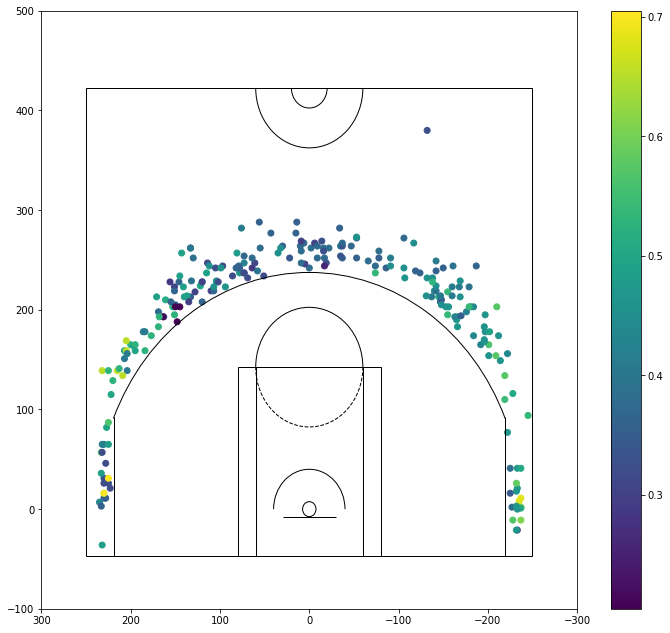

In [38]:
plt.figure(figsize=(12,11))
plt.scatter(X_test.LOC_X, X_test.LOC_Y,c=Pr_pred)
h.draw_court(outer_lines=True)
plt.colorbar()
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()